# Importing Header, SoilPrep, and PlotFunctions

In [1]:
import import_ipynb 
from Header import *

import import_ipynb
from SoilPrep import *

importing Jupyter notebook from Header.ipynb
importing Jupyter notebook from SoilPrep.ipynb


In [2]:
import import_ipynb
from PlotFunctions import *

importing Jupyter notebook from PlotFunctions.ipynb
importing Jupyter notebook from LoadDataMetaData.ipynb


C:\Users\abhis\anaconda3\lib\site-packages\nbformat\__init__.py:92: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


## Loading  Mtree 

In [3]:
with open ('HMtree.pickle', 'rb') as file:
    HMtree = pickle.load(file)
 

In [4]:
with open ('Feature.pickle', 'rb') as file:
    feature_scores = pickle.load(file)
 

In [5]:
with open ('Models.pickle', 'rb') as file:
    model_details = pickle.load(file)
 

 #  Best Models for Sand, Silt, Clay, TOC, and CaCO3..

In [6]:
# feature_scores = {}

# model_details ={}

In [7]:
#HMtree['plsr']['TOC']['none']['cr'][33]

##  Sand 

### Gradient Boosting Regression Tree

Sand -> [ r2 - **0.43**, Spec - fod2, n_bands -37]     <br/><br/>
***Description***: To obtain the best model for sand using gbrt method we trained the model on the first order derivative of the smoothed spectra which is  resampled to 37 bands.

In [8]:
sand_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 30, random_state = 42) 
sand_model_gbrt.fit(fod_sampled[37],  T[0])

GradientBoostingRegressor(n_estimators=30, random_state=42)

In [9]:
# feature_scores['Sand'] = permutation_importance(sand_model_gbrt, fod_sampled[37], T[0], n_repeats=20, random_state=0)
# model_details['Sand'] = {'method': 'gbrt', 'spec': fod_sampled[37], 'spec_proc': 'fod2', 'n_bands': 37}

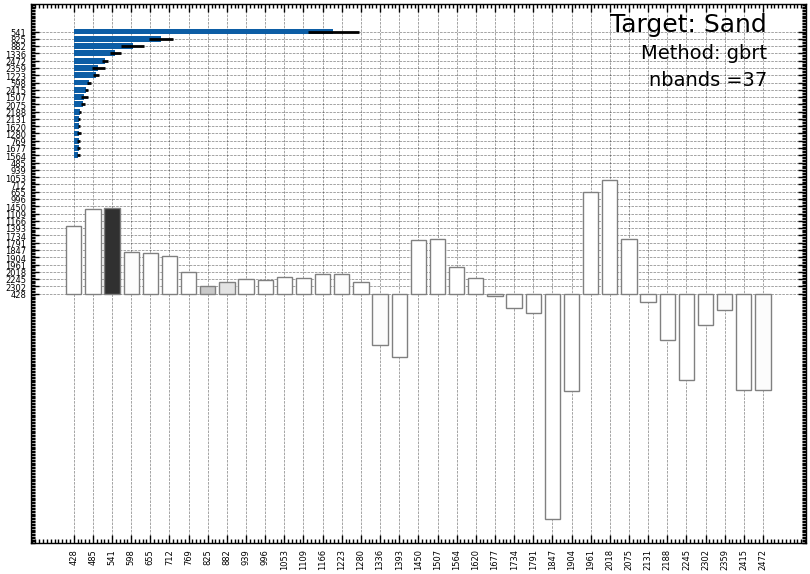

In [10]:
show_important_features_for ('Sand', model_details, feature_scores, 30, 200, 2)

##  Silt 

### Cubist

Silt -> [ r2 - **0.25**, Spec - fod2, n_bands - 80]   <br/><br/>
***Description***:To obtain the best model for silt using cubist method we trained the model on the first order derivative of the smoothed spectra which is resampled to 80 bands.


In [11]:
silt_model_cubist = Cubist(n_committees = 5, n_rules = 10) 
silt_model_cubist.fit(fod_sampled[80],  T[1])

Cubist(n_committees=5, n_rules=10)

In [12]:
# feature_scores['Silt'] = permutation_importance(silt_model_cubist, fod_sampled[80], T[1], n_repeats=20, random_state=0)
# model_details['Silt'] = {'method': 'cubist', 'spec': fod_sampled[80], 'spec_proc': 'fod2', 'n_bands': 80}

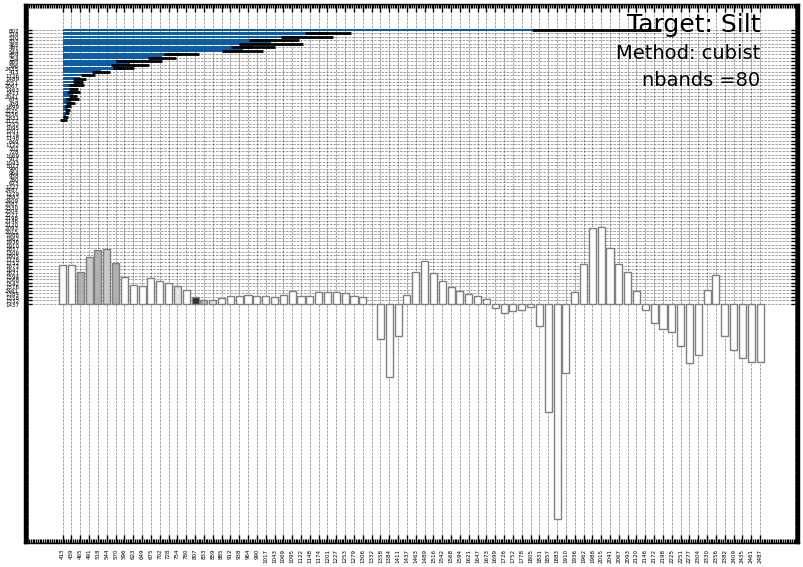

In [13]:
show_important_features_for ('Silt', model_details, feature_scores, 50, 500, 2)

## Clay 

### Gradient Boosting Regression Tree

Clay -> [ r2 - **0.31**, Spec - cr, n_bands - 70]   <br/><br/>
***Description***:To obtain the best model for clay using gbrt method we trained the model on the continuum removal of the smoothed spectra which is resampled to 70 bands.


In [14]:
clay_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 50, random_state = 42)
clay_model_gbrt.fit(sampled_cr[70],  T[2])

GradientBoostingRegressor(max_depth=5, n_estimators=50, random_state=42)

In [15]:
# feature_scores['Clay'] = permutation_importance(clay_model_gbrt, sampled_cr[70], T[2], n_repeats=20, random_state=0)
# model_details['Clay'] = {'method': 'gbrt', 'spec': sampled_cr[70], 'spec_proc': 'cr', 'n_bands': 70}

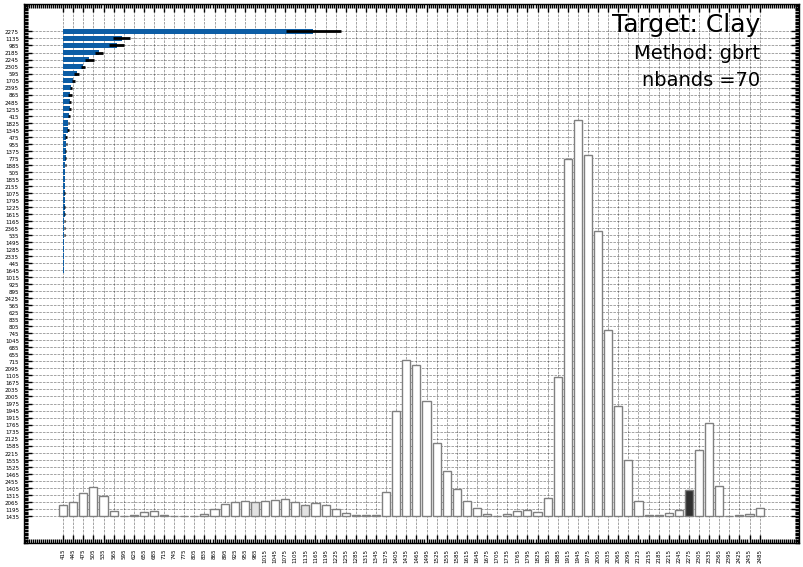

In [16]:
show_important_features_for ('Clay', model_details, feature_scores, 40, 250, 2)

## TOC

### PLSR 

TOC -> [ r2 - **0.44**, Spec - cr, n_bands - 33]   <br/><br/>
***Description***:To obtain the best model for TOC using plsr method we trained the model on the continuum removal of the smoothed spectra which is resampled to 33 bands.


In [17]:
TOC_model_plsr = PLSRegression(n_components=8, scale=True)
TOC_model_plsr.fit(sampled_cr[33],  T[3])

PLSRegression(n_components=8)

In [18]:
# feature_scores['TOC'] = permutation_importance(TOC_model_plsr, sampled_cr[33], T[3], n_repeats=20, random_state=0)
# model_details['TOC'] = {'method': 'plsr', 'spec': sampled_cr[33], 'spec_proc': 'cr', 'n_bands': 33}

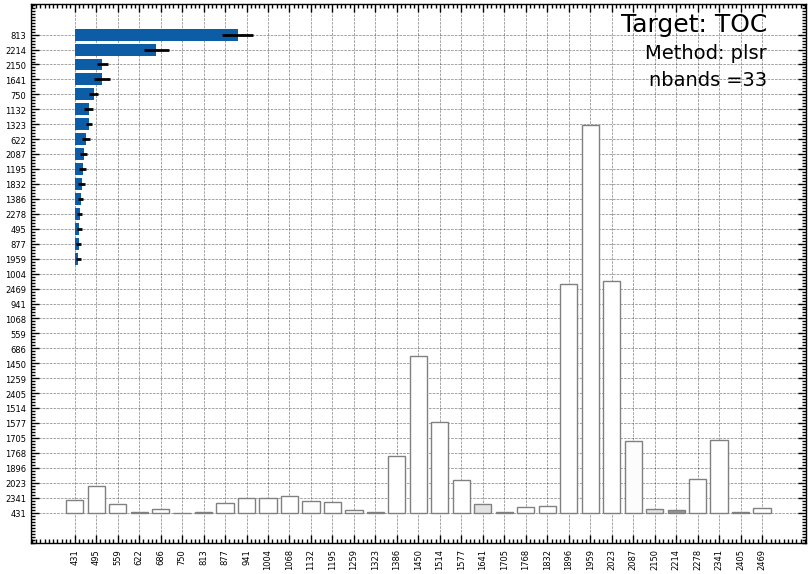

In [19]:
show_important_features_for ('TOC', model_details, feature_scores, 20, 120, 2)

In [20]:
# with open ('Feature.pickle', 'wb') as file:
#     pickle.dump(feature_scores, file)
     

In [21]:
# with open ('Models.pickle', 'wb') as file:
#     pickle.dump(model_details, file)